# 8장. 경사 하강법 (Gradient Descent)

## 1. 그래디언트 계산

### 1.1 함수의 변화율

In [1]:
from typing import Callable

def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

### 1.2 함수의 미분

In [2]:
def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

### 1.3 두 방법의 비교

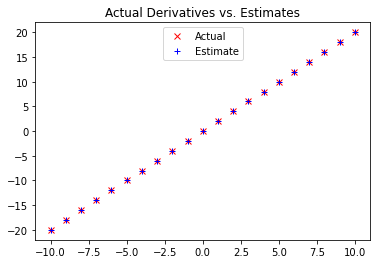

In [3]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

# plot to show they're basically the same
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')       # red  x
plt.plot(xs, estimates, 'b+', label='Estimate')   # blue +
plt.legend(loc=9)
plt.show()
plt.close()

### 1.4 다변수 함수의 변화율

In [6]:
from scratch.linear_algebra import Vector, dot
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """Returns the i-th partial difference quotient of f at v"""
    w = [v_j + (h if j == i else 0)    # add h to just the ith element of v
            for j, v_j in enumerate(v)]

    return (f(w) - f(v)) / h

In [7]:
def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

## 2. 경사 하강법

### 2.1 그래디언트 스텝

In [9]:
import random
from scratch.linear_algebra import distance, add, scalar_multiply

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

### 2.2  경사 하강법 - 2차 다변수 함수 예시

In [10]:
def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

In [12]:
# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)    # compute the gradient at v
    v = gradient_step(v, grad, -0.01)    # take a negative gradient step
    # print(epoch, v)

assert distance(v, [0, 0, 0]) < 0.001    # v should be close to 0

### 2.3 경사 하강법 - 단순 선형 회귀 예시

#### 데이터 생성

In [13]:
# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

#### 그래디언트 계산

In [14]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept    # The prediction of the model.
    error = (predicted - y)              # error is (predicted - actual)
    squared_error = error ** 2           # We'll minimize squared error
    grad = [2 * error * x, 2 * error]    # using its gradient.
    return grad

#### 배치 경사 하강법

In [15]:
    from scratch.linear_algebra import vector_mean
    
    # Start with random values for slope and intercept.
    theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
    
    learning_rate = 0.001
    
    for epoch in range(5000):
        # Compute the mean of the gradients
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
        # Take a step in that direction
        theta = gradient_step(theta, grad, -learning_rate)
        # print(epoch, theta)
    
    slope, intercept = theta
    assert 19.9 < slope < 20.1,   "slope should be about 20"
    assert 4.9 < intercept < 5.1, "intercept should be about 5"

#### 미니 배치 경사 하강법

##### 미니 배치 생성

In [16]:
from typing import TypeVar, List, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # Start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

##### 미니 배치 경사하강법

In [17]:
# Minibatch gradient descent example

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    # print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

#### 확률적 경사 하강법

In [18]:
# Stochastic gradient descent example

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    # print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"